In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd
from scipy.stats import linregress

# Temperatura ambiente

15372
8385
1355


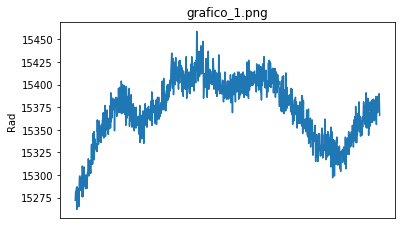

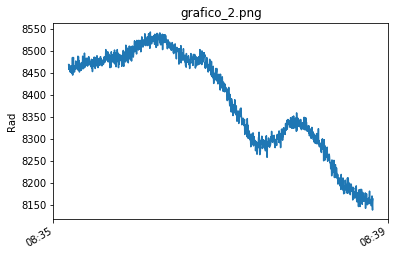

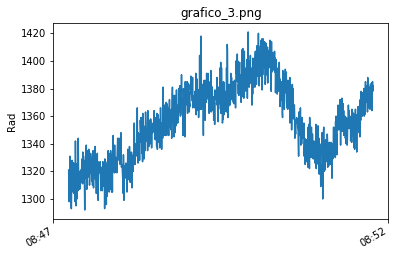

In [3]:
files_calibrazione_amb = np.array(['ambiente/dati/cal_g5_z6877_amb.txt', 'ambiente/dati/Cal_G5_Z8900_amb.txt', 'ambiente/dati/Cal_G5_z10923_amb.txt'])

titolo_grafici_amb = np.array(['grafico_1.png', 'grafico_2.png', 'grafico_3.png'])

media_amb = np.array ([0,0,0])

for i in range(0,3):
    calibrazione_1 = pd.read_csv (files_calibrazione_amb[i],
                                    sep = ' ',
                                    header=None,
                                    skiprows=10,
                                    decimal='.',
                                    names=['data','ora','rad','temperatura'])
    
    calibrazione_1['data_ora'] = calibrazione_1['data'].map(str) + ' ' + calibrazione_1['ora'].map(str)
    calibrazione_1['data_ora'] = pd.to_datetime(calibrazione_1['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
    calibrazione_1 = calibrazione_1.iloc[:,[-1,2,3]]
    
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    ax.plot(calibrazione_1['data_ora'],calibrazione_1['rad'], label='temp')
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

    plt.title(titolo_grafici_amb[i])
    plt.ylabel('Rad')

    plt.savefig(titolo_grafici_amb[i])
    
    media_amb[i] = calibrazione_1.rad.mean()
    print(media_amb[i])

In [4]:
print(media_amb)

[15372  8385  1355]


## Ricavo temperatura ambiente 

In [5]:
parabola = pd.read_csv('dati/TDA2023_04_18.txt' , sep=';', header=None, comment = '#')

In [6]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3:'hour', 4: 'minute', 5:'second', 45: 'T_1', 46: 'T_2', 47: 'T_3', 48: 'T_4'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[['day','month','year','hour','minute','second']])
parabola = parabola.loc[:, ['data_ora','T_1','T_2','T_3','T_4']]

In [7]:
mask_1 = parabola.data_ora >= '2023-04-18 08:54:00'
mask_2 = parabola.data_ora <= '2023-04-18 09:11:00'

parabola = parabola.loc[mask_1 & mask_2]

In [8]:
media_1 = parabola.T_1.mean() + 273.15
media_2 = parabola.T_2.mean() + 273.15
media_3 = parabola.T_3.mean() + 273.15

In [9]:
media_temperatura_amb = (media_1 + media_2 + media_3)/3

# Azoto

16228
10569
9199
1870


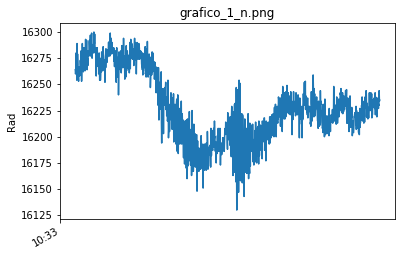

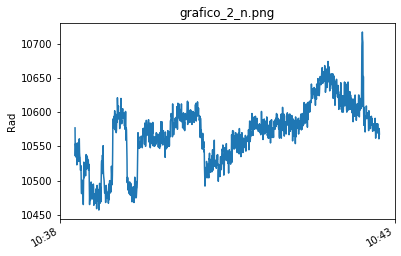

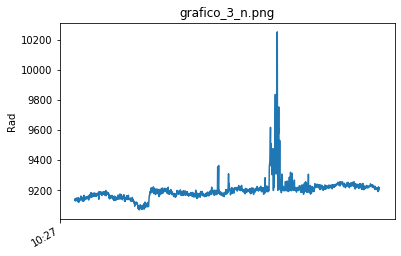

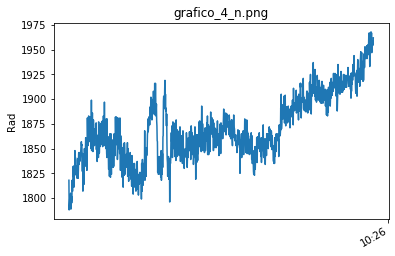

In [10]:
files_calibrazione_n = np.array(['azoto/dati/Cal_g5_z2832_az.txt', 'azoto/dati/Cal_g5_z4450_az.txt', 'azoto/dati/Cal_g5_z4854_az.txt', 'azoto/dati/cal_z5_z6877_az.txt'])

titolo_grafici_n = np.array(['grafico_1_n.png', 'grafico_2_n.png', 'grafico_3_n.png', 'grafico_4_n.png'])
media_n = np.array ([0,0,0,0])

for i in range(0,4):
    calibrazione_2 = pd.read_csv (files_calibrazione_n[i],
                                    sep = ' ',
                                    header=None,
                                    skiprows=10,
                                    decimal='.',
                                    names=['data','ora','rad','temperatura'])
    
    calibrazione_2['data_ora'] = calibrazione_2['data'].map(str) + ' ' + calibrazione_2['ora'].map(str)
    calibrazione_2['data_ora'] = pd.to_datetime(calibrazione_2['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
    calibrazione_2 = calibrazione_2.iloc[:,[-1,2,3]]
    
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    ax.plot(calibrazione_2['data_ora'],calibrazione_2['rad'], label='temp')
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

    plt.title(titolo_grafici_n[i])
    plt.ylabel('Rad')

    plt.savefig(titolo_grafici_n[i])
    
    media_n[i] = calibrazione_2.rad.mean()
    print(media_n[i])

# Calibrazione ambiente

Text(0.5, 0, 'offset')

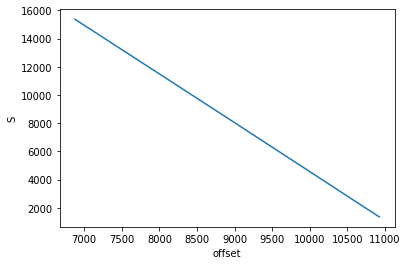

In [11]:
zero_base_amb = np.array([6877, 8900, 10923])

plt.plot(zero_base_amb, media_amb)
plt.ylabel('S')
plt.xlabel('offset')


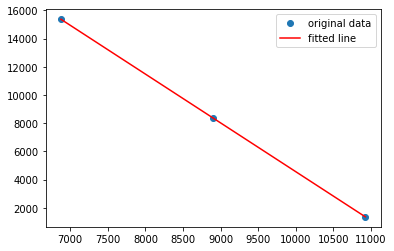

In [12]:
amb = linregress(zero_base_amb,media_amb) #x and y are arrays or lists.

plt.plot(zero_base_amb, media_amb, 'o', label='original data')
plt.plot(zero_base_amb, amb.intercept + amb.slope*(zero_base_amb), 'r', label='fitted line')
plt.legend()
plt.show()

# Calibrazione azoto

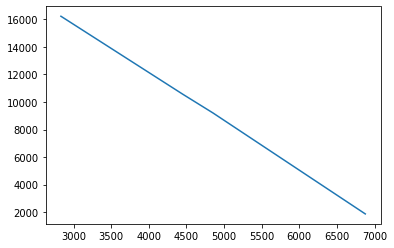

In [13]:
zero_base_n = np.array([2832, 4450, 4854, 6877])

plt.plot(zero_base_n, media_n)

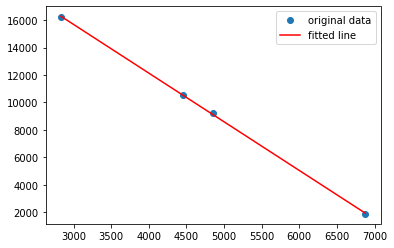

In [14]:
azoto = linregress(zero_base_n,media_n) #x and y are arrays or lists.

plt.plot(zero_base_n, media_n, 'o', label='original data')
plt.plot(zero_base_n, azoto.intercept + azoto.slope*(zero_base_n), 'r', label='fitted line')
plt.legend()
plt.show()

## Ricavo gamma

In [15]:
print(media_temperatura_amb)

temp_azoto = 77.36
print(temp_azoto)

293.673431372549
77.36


In [16]:
print(azoto.slope)
print(amb.slope)

-3.5508439128721676
-3.464409293129016


In [17]:
print(azoto.intercept)
print(amb.intercept)

26344.54882885963
39203.90937551491


In [18]:
gamma = (azoto.intercept - amb.intercept)/(84*(media_temperatura_amb - temp_azoto))
print(gamma)

-0.7077120666250379


## ricavo t_r

In [19]:
for i in range(0,3):
    t_r_amb = (media_amb[i] - amb.slope*zero_base_amb[i])/(84*gamma) - media_temperatura_amb
    print(t_r_amb)

-953.0205181282149
-953.3821798731856
-953.0205181282149


In [20]:
for i in range(0,4):
    t_r_n = (media_n[i] - azoto.slope*zero_base_n[i])/(84*gamma) - temp_azoto
    print(t_r_n)

-519.4955197291906
-520.9466319872912
-522.0323059069146
-519.582379569032
